# Análisis Discriminante Lineal (LDA)

**Autor:** Cristian Daniel Ccopa Acero

**Curso:** Aprendizaje Supervisado

In [30]:
import pandas as pd

file_path = 'buenosclientes.xlsx'
df = pd.read_excel(file_path, sheet_name=0)

df.head()


,codigo oficina,codigo cliente,segmento cash,monto aprobado de cash,codigo analista,ultima garantia,ultima evaluzacion economica,mora promedio del cliente (dias),atraso maximo del cliente (dias),atraso maximo del cliente ultimos 3 meses (dias),...,numero de empresas en la SBS,deuda directa en la SBS,numero de empresas en la SBS del conyugue,deuda directa en la SBS del conyugue,actividad,Ingresos,egresos,resultado neto,categoria analista,sugerido
0,34,340154400,A,1500,9163,...,2017-10-06,0.44,4,0,...,1.0,344.94,NaN,NaN,Otras actividades,2160,1098,1062,SENIOR,1500.0
1,34,340181221,A,1500,9163,GARANTIA PERSONAL ...,2017-04-06,0.00,0,0,...,1.0,3892.17,NaN,NaN,Comercio x Mayor,4890,3437,1453,SENIOR,1500.0
2,34,340008374,A+,12000,9163,...,2017-07-04,1.35,8,5,...,1.0,904.15,NaN,NaN,Otras actividades,22600,19190,3410,SENIOR,12000.0
3,34,340088509,A,1000,9163,...,2017-02-14,0.67,7,7,...,2.0,21802.17,NaN,NaN,Otras actividades,14040,10528,3512,SENIOR,1000.0
4,34,340085851,A,9000,9163,...,2016-12-05,2.77,19,2,...,3.0,4216.80,NaN,NaN,Otras actividades,3272,530,2742,SENIOR,9000.0


## Paso 2: Identificar la Variable Objetivo y Eliminar Variables Irrelevantes
El objetivo es conservar solo las columnas que podrían influir en la variable "segmento cash". Primero, enumeramos las columnas y luego las seleccionamos basándonos en esta lógica.

In [31]:
df.columns

Index(['codigo oficina', 'codigo cliente', 'segmento cash',
       'monto aprobado de cash', 'codigo analista', 'ultima garantia',
       'ultima evaluzacion economica', 'mora promedio del cliente (dias)',
       'atraso maximo del cliente (dias)',
       'atraso maximo del cliente ultimos 3 meses (dias)',
       'atraso actual (dias)', 'fecha ultimo desembolso',
       'numero de creditos vigentes', 'maximo capital desembolsado vigente',
       'deuda total en compartamos', 'numero de empresas en la SBS',
       'deuda directa en la SBS', 'numero de empresas en la SBS del conyugue',
       'deuda directa en la SBS del conyugue', 'actividad', 'Ingresos',
       'egresos', 'resultado neto', 'categoria analista', 'sugerido'],
      dtype='object')

## Paso 3: Limpieza general de los datos
Esto incluye eliminar duplicados y manejar valores faltantes.

In [32]:
df = df.drop_duplicates()

print("Valores faltantes antes de la limpieza:")
print(df.isnull().sum())

Valores faltantes antes de la limpieza:
codigo oficina                                        0
codigo cliente                                        0
segmento cash                                         0
monto aprobado de cash                                0
codigo analista                                       0
ultima garantia                                       0
ultima evaluzacion economica                          0
mora promedio del cliente (dias)                      0
atraso maximo del cliente (dias)                      0
atraso maximo del cliente ultimos 3 meses (dias)      0
atraso actual (dias)                                 16
fecha ultimo desembolso                               0
numero de creditos vigentes                           0
maximo capital desembolsado vigente                   0
deuda total en compartamos                            0
numero de empresas en la SBS                          3
deuda directa en la SBS                               3
numero d

In [33]:
df = df.dropna(subset=['segmento cash'])

# df = df.fillna(0)  # Cambia este método según tus necesidades (ej. con promedio, mediana, etc.)

print("Valores faltantes después de la limpieza:")
df.isnull().sum()


Valores faltantes después de la limpieza:


codigo oficina                                        0
codigo cliente                                        0
segmento cash                                         0
monto aprobado de cash                                0
codigo analista                                       0
ultima garantia                                       0
ultima evaluzacion economica                          0
mora promedio del cliente (dias)                      0
atraso maximo del cliente (dias)                      0
atraso maximo del cliente ultimos 3 meses (dias)      0
atraso actual (dias)                                 16
fecha ultimo desembolso                               0
numero de creditos vigentes                           0
maximo capital desembolsado vigente                   0
deuda total en compartamos                            0
numero de empresas en la SBS                          3
deuda directa en la SBS                               3
numero de empresas en la SBS del conyugue       

## Paso 4: Seleccionar solo las variables de interés
Elimina las variables que no necesitas y conserva solo las relevantes.

In [34]:
variables_interes = [
    "segmento cash", "monto aprobado de cash", "mora promedio del cliente (dias)", 
    "atraso maximo del cliente (dias)", "numero de empresas en la SBS", 
    "deuda directa en la SBS", "Ingresos", "egresos", "resultado neto"
]

df = df[variables_interes]

df.head()


,segmento cash,monto aprobado de cash,mora promedio del cliente (dias),atraso maximo del cliente (dias),numero de empresas en la SBS,deuda directa en la SBS,Ingresos,egresos,resultado neto
0,A,1500,0.44,4,1.0,344.94,2160,1098,1062
1,A,1500,0.00,0,1.0,3892.17,4890,3437,1453
2,A+,12000,1.35,8,1.0,904.15,22600,19190,3410
3,A,1000,0.67,7,2.0,21802.17,14040,10528,3512
4,A,9000,2.77,19,3.0,4216.80,3272,530,2742


In [35]:
df = df.dropna()

In [36]:
df.isnull().sum()

segmento cash                       0
monto aprobado de cash              0
mora promedio del cliente (dias)    0
atraso maximo del cliente (dias)    0
numero de empresas en la SBS        0
deuda directa en la SBS             0
Ingresos                            0
egresos                             0
resultado neto                      0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 0 to 113
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   segmento cash                     111 non-null    object 
 1   monto aprobado de cash            111 non-null    int64  
 2   mora promedio del cliente (dias)  111 non-null    float64
 3   atraso maximo del cliente (dias)  111 non-null    int64  
 4   numero de empresas en la SBS      111 non-null    float64
 5   deuda directa en la SBS           111 non-null    float64
 6   Ingresos                          111 non-null    int64  
 7   egresos                           111 non-null    int64  
 8   resultado neto                    111 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 8.7+ KB


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

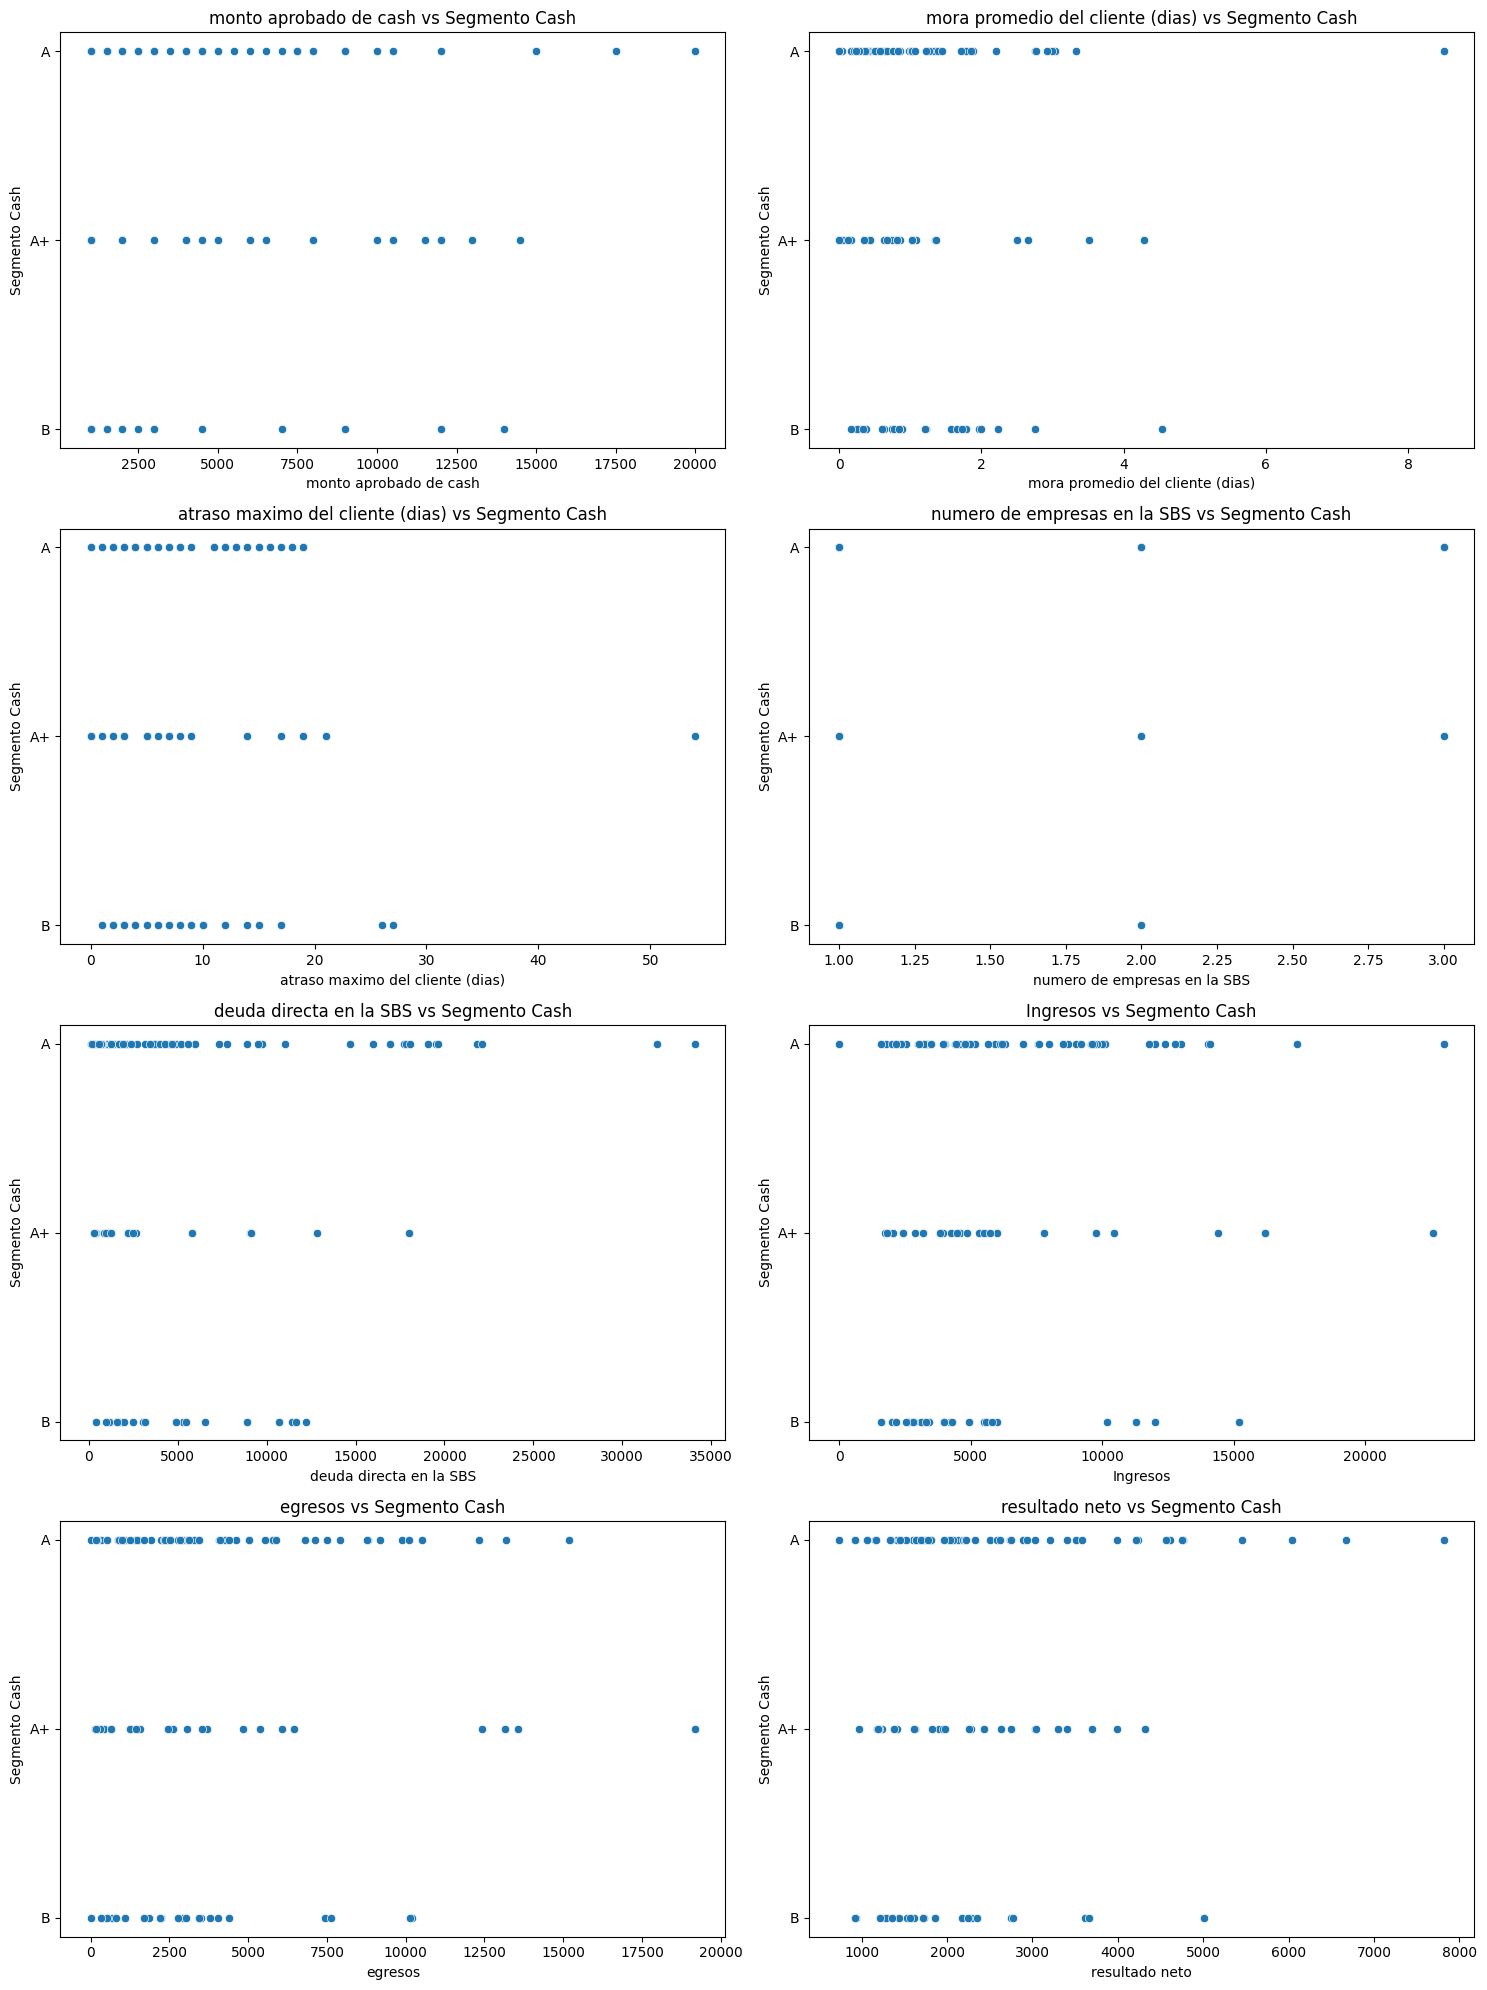

In [40]:
# Set plot size
plt.figure(figsize=(15, 20))

# Plot each variable of interest against "segmento cash" using scatter plots
for idx, column in enumerate(variables_interes[1:], 1):
    plt.subplot(4, 2, idx)  # Create a subplot for each pair
    sns.scatterplot(data=df, x=column, y="segmento cash")
    plt.title(f'{column} vs Segmento Cash')
    plt.xlabel(column)
    plt.ylabel("Segmento Cash")

plt.tight_layout()
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar las variables predictoras y la variable objetivo

In [41]:
# Separar la variable objetivo (Y) y las variables predictoras (X)
X = df.drop("segmento cash", axis=1)
y = df["segmento cash"]


### Dividir el conjunto de datos en entrenamiento y prueba

In [43]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Aplicar el modelo LDA

In [44]:
# Inicializar y entrenar el modelo LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

### Hacer predicciones y evaluar el modelo

In [45]:
# Realizar predicciones en el conjunto de prueba
y_pred = lda.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Precisión del modelo LDA:", accuracy)
print("\nMatriz de confusión:\n", conf_matrix)
print("\nReporte de clasificación:\n", class_report)


Precisión del modelo LDA: 0.6764705882352942

Matriz de confusión:
 [[19  0  1]
 [ 6  4  0]
 [ 4  0  0]]

Reporte de clasificación:
               precision    recall  f1-score   support

           A       0.66      0.95      0.78        20
          A+       1.00      0.40      0.57        10
           B       0.00      0.00      0.00         4

    accuracy                           0.68        34
   macro avg       0.55      0.45      0.45        34
weighted avg       0.68      0.68      0.62        34



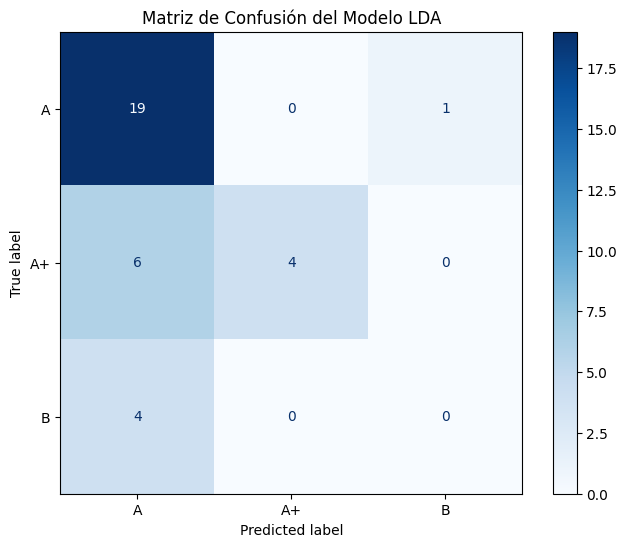

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Visualizar la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(lda, X_test, y_test, cmap="Blues", ax=ax)
plt.title("Matriz de Confusión del Modelo LDA")
plt.show()


### Distribución de la Proyección del LDA

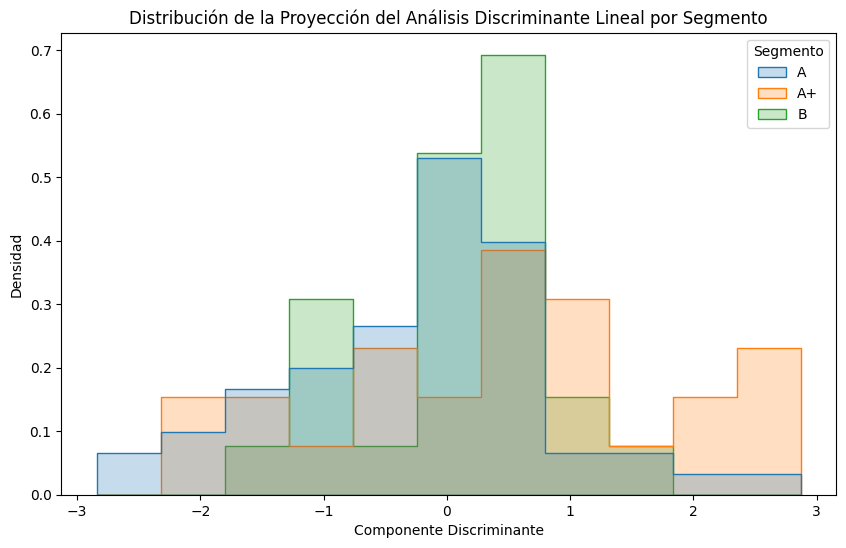

In [49]:
# Proyección sobre la dirección discriminante
lda_full = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda_full.fit_transform(X, y)

# Crear DataFrame para visualización
df_lda = pd.DataFrame(X_lda, columns=['Discriminante'])
df_lda['Segmento'] = y.replace({0: 'B', 1: 'A'})

# Visualizar la distribución de la proyección discriminante
plt.figure(figsize=(10, 6))
sns.histplot(data=df_lda, x='Discriminante', hue='Segmento', element='step', stat='density', common_norm=False)
plt.title("Distribución de la Proyección del Análisis Discriminante Lineal por Segmento")
plt.xlabel("Componente Discriminante")
plt.ylabel("Densidad")
plt.show()
